<a href="https://colab.research.google.com/github/jdug1981/proyecto_final/blob/main/ProyectoFinal_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Vision_producto](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)



#**PROYECTO INTEGRADOR FINAL: BANK TELEMARKETING**
El objetivo es predecir si un cliente se suscribirá a un depósito a plazo fijo que se le ofrece mediante una campaña de telemarketing.

Para ello se propone crear un modelo de clasificación de aprendizaje automático con la finalidad poder usarlo en una población definida por un banco minorista de Portugal en el contexto de la recesión global del año 2008.
[Link Product Vision Board](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

## **DESCRIPCION DE LOS DATOS**
**1. Información Importante:**

Los datos están relacionados con campañas de marketing directo de una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder saber si el cliente se suscribiría a un depósito a plazo fijo.





**2. Objetivo:**

El objetivo es diseñar un modelo de clasificación para predecir si el cliente suscribirá un depósito a plazo (variable y).

**3. Número de Instancias:**

45211 for bank-full.csv (4521 for bank.csv)

**4. Número de atributos:**

 16 varaibles de entrada

 1 variable de salida o variable Objetivo


**5. Información sobre las Variables:**

#Input variables:

**Datos Relacionados con el Cliente:**

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   # related with the last contact of the current campaign:

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  # Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


**Missing Attribute Values:**

None


Configuracion de librerias

# Analisis Exploratorio de la Data

Creamos carpetas para modelo de Regresion logística

In [78]:
# Scikit-Learn
import sklearn

# Imports comunes
import pandas as pd
import numpy as np

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})


In [155]:
pddf = pd.read_csv('bank_full.csv', sep=";")
pddf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [156]:
categorical_columns =pddf.select_dtypes(include=['object'])
categorical_table=categorical_columns.describe().transpose()
categorical_table["%"]=100*categorical_table["freq"]/categorical_table["count"]
categorical_table

,count,unique,top,freq,%
job,45211,12,blue-collar,9732,21.525735
marital,45211,3,married,27214,60.193316
education,45211,4,secondary,23202,51.319369
default,45211,2,no,44396,98.197341
housing,45211,2,yes,25130,55.583818
loan,45211,2,no,37967,83.977351
contact,45211,3,cellular,29285,64.774059
month,45211,12,may,13766,30.448342
poutcome,45211,4,unknown,36959,81.747805
y,45211,2,no,39922,88.30152


In [157]:
# Aplicar el mapeo a la variable categórica
pddf['y'] = pddf['y'].map({'yes': 1, 'no': 0})


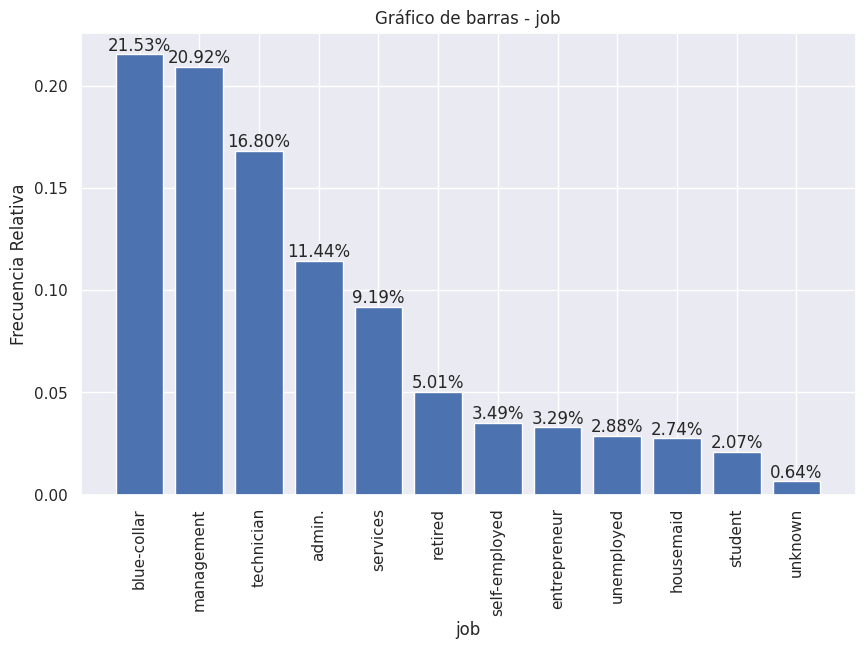

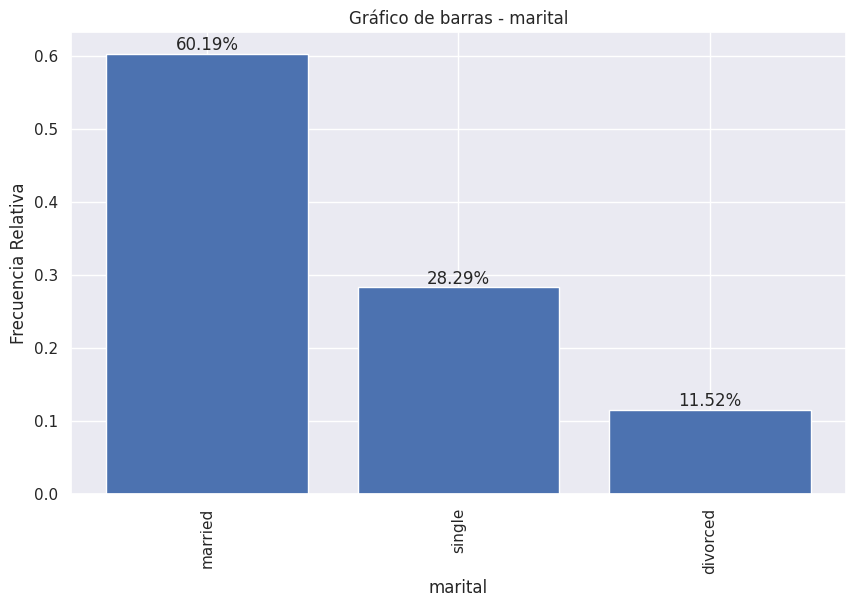

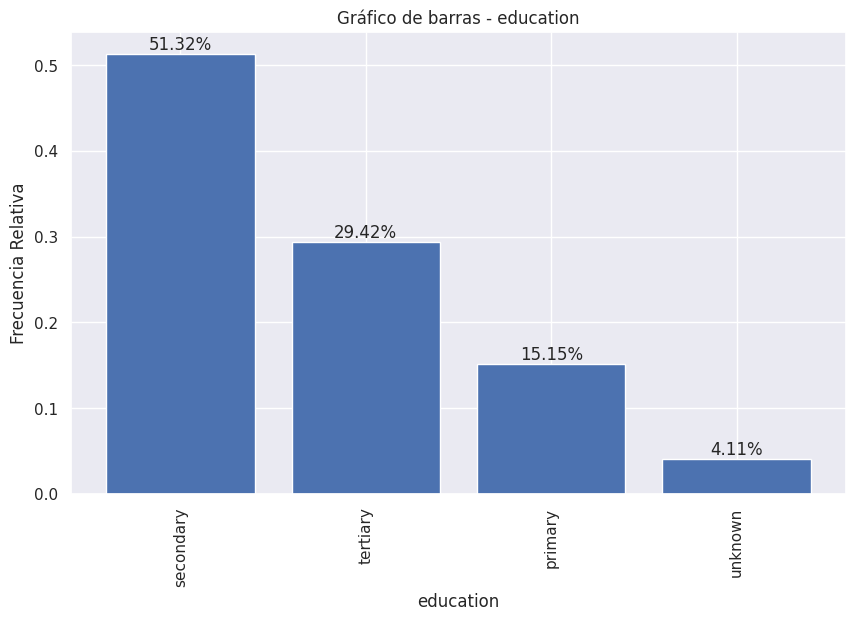

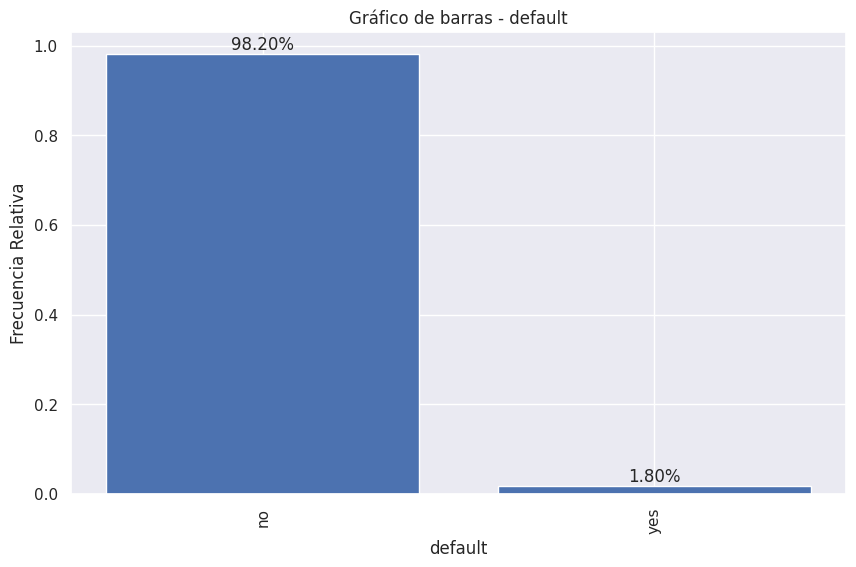

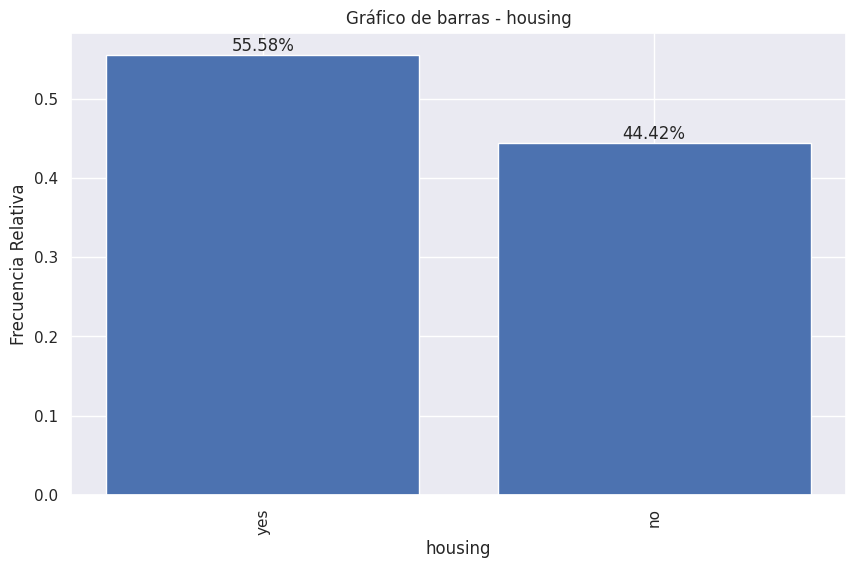

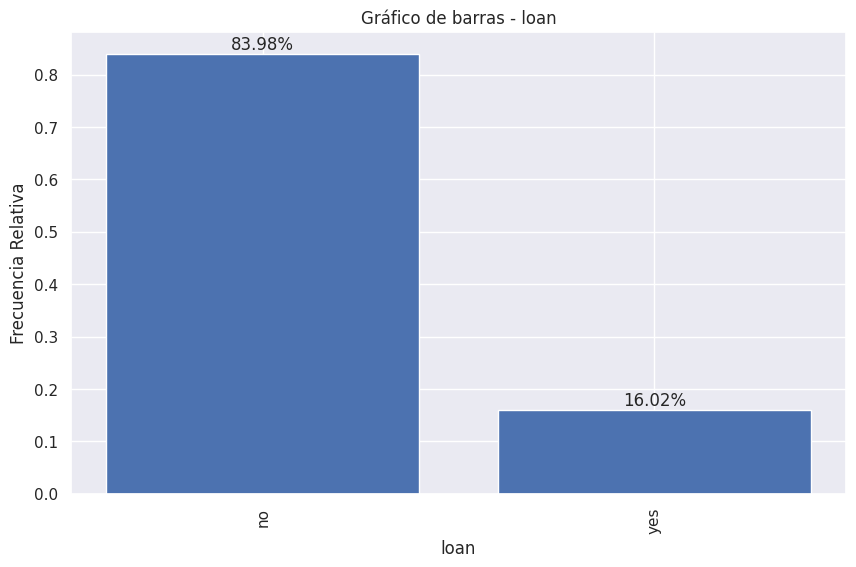

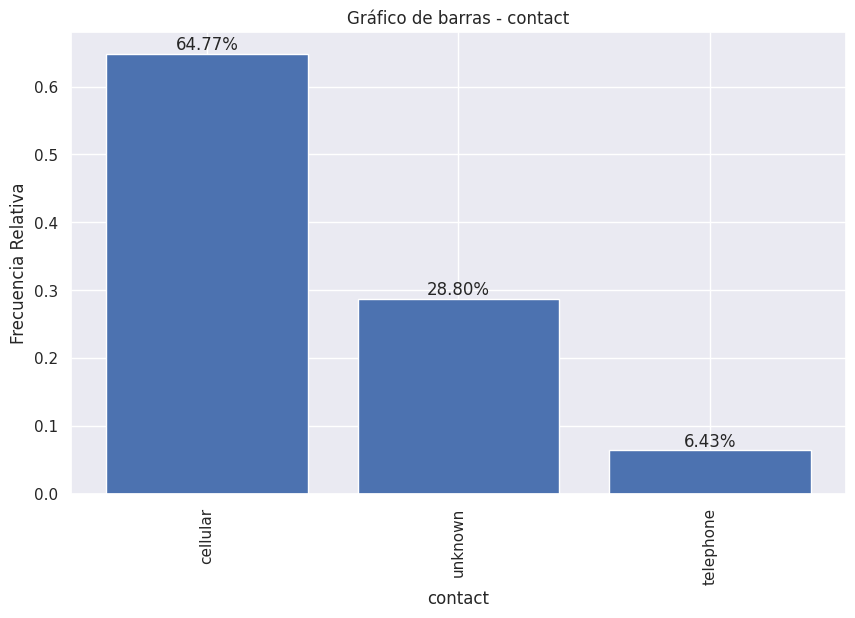

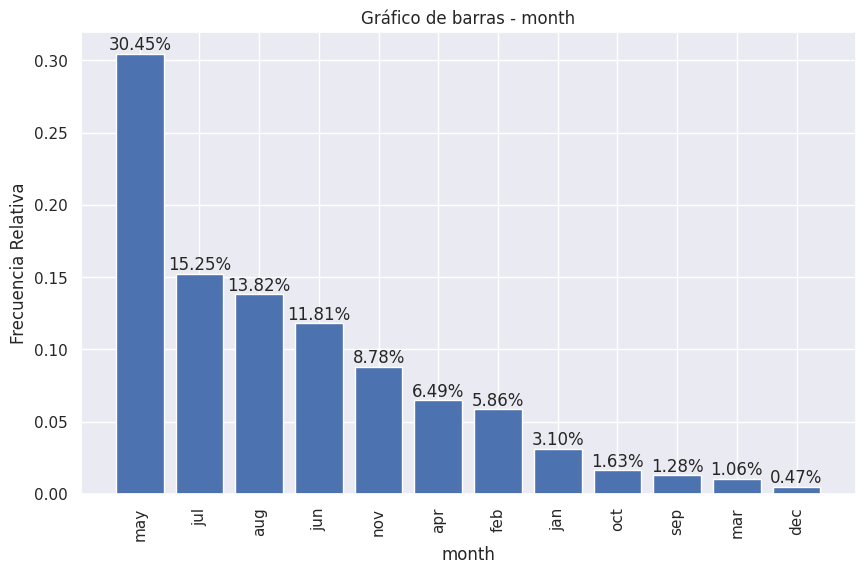

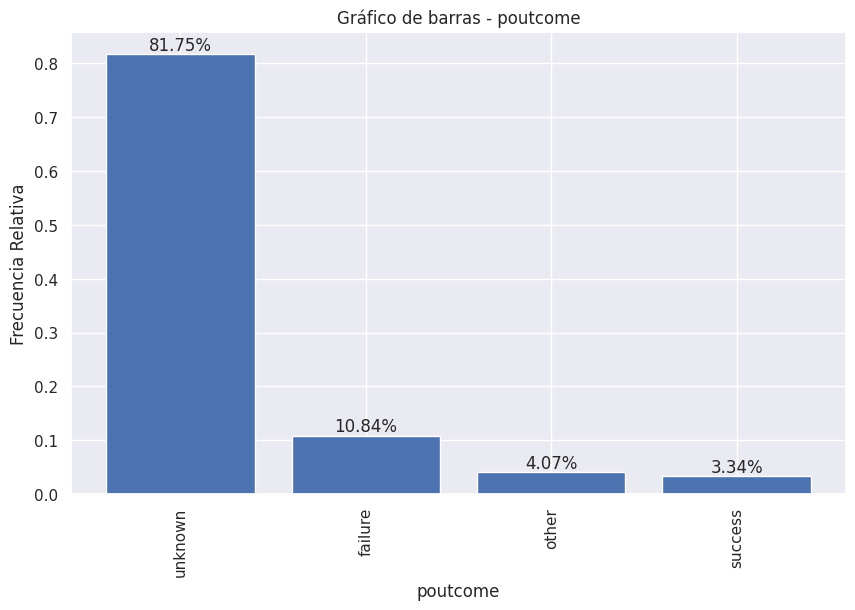

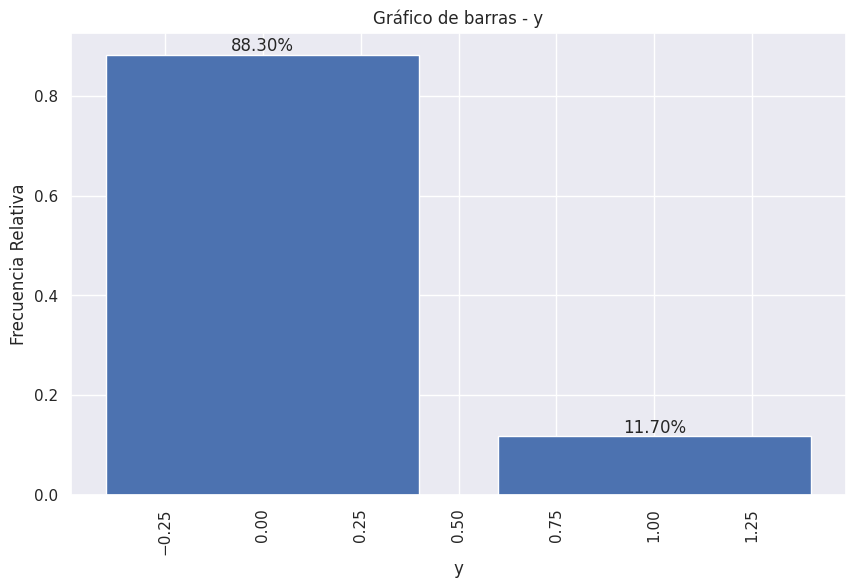

In [158]:

for column in categorical_columns:
    category_counts = pddf[column].value_counts(normalize=True)  # Calcular las frecuencias relativas
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frecuencia Relativa')
    plt.title(f"Gráfico de barras - {column}")
    plt.xticks(rotation=90)

    # Mostrar las frecuencias relativas en las etiquetas de las barras
    for i, v in enumerate(category_counts.values):
        plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    plt.show()


In [81]:
numeric_columns = pddf.select_dtypes(include=['int64', 'float'])
numeric_columns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [92]:
target_column = 'y'  # Reemplaza 'variable_objetivo' por el nombre de tu variable objetivo
for column_names in  categorical_columns.columns.tolist():
  contingency_table = pd.crosstab(pddf['y'], column_names)
  print("Tabla de contingencia:")
  print(contingency_table)





Tabla de contingencia:
col_0    job
y           
no     39922
yes     5289
Tabla de contingencia:
col_0  marital
y             
no       39922
yes       5289
Tabla de contingencia:
col_0  education
y               
no         39922
yes         5289
Tabla de contingencia:
col_0  default
y             
no       39922
yes       5289
Tabla de contingencia:
col_0  housing
y             
no       39922
yes       5289
Tabla de contingencia:
col_0   loan
y           
no     39922
yes     5289
Tabla de contingencia:
col_0  contact
y             
no       39922
yes       5289
Tabla de contingencia:
col_0  month
y           
no     39922
yes     5289
Tabla de contingencia:
col_0  poutcome
y              
no        39922
yes        5289
Tabla de contingencia:
col_0      y
y           
no     39922
yes     5289


In [91]:

column_names = categorical_columns.columns.tolist()
column_names

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [99]:
# Realizar submuestreo aleatorio
df_minority = pddf[pddf['y'] == 'yes']
df_majority = pddf[pddf['y'] == 'no'].sample(n=len(df_minority), random_state=42)

# Concatenar los subconjuntos
df_balanced = pd.concat([df_minority, df_majority])

# Verificar el balance de clases
df_balanced['y'].value_counts()
df_balanced

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38515,49,blue-collar,married,secondary,no,1230,yes,yes,cellular,15,may,167,2,373,3,failure,no
29336,28,management,single,tertiary,no,-328,yes,no,telephone,2,feb,318,2,-1,0,unknown,no
19728,37,management,single,tertiary,no,171,yes,yes,cellular,7,aug,250,3,-1,0,unknown,no
21281,55,admin.,married,secondary,no,512,no,no,cellular,18,aug,115,4,-1,0,unknown,no
